# **TCS-iON RIO 125**

**Automate extraction of handwritten text from an image** 



# **Name: Anjali Alurwar**

# **Internship Project Topic: Automate extraction of handwritten text from an image.**
# **Name of the Organization: TCS iON.**

# **Name of the Industry Mentor: Anamika Chatterjee.**

# **Name of the Institute: Sreenidhi Institute of Science and Technology.**


# **INSTALLING THE REQUIRED LIBRARIES :**

In [4]:
!sudo add-apt-repository ppa:alex-p/tesseract-ocr

!sudo apt-get update

!sudo apt install tesseract-ocr

!sudo pip install pytesseract


  The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available. It can read a wide variety of image formats and convert
 them to text in over 40 languages. This package includes the command
 line tool.
 More info: https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [94.1 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Rele

## **INPUT : THE TEST IMAGE IS SAVED IN THE DRIVE.THE LOCATION IS MOUNTED.THE MODULE RETRIEVES THE TEXT FROM THE MOUNTED IMAGE.**

In [90]:
#Image Source Input Module 
from google.colab import drive
drive.mount('/content/drive')

file_name ='/content/drive/My Drive/Colab Notebooks/Test_Images/test_image_5.png'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Handwritten images taken from :
http://www.fki.inf.unibe.ch/databases/iam-handwriting-database
and self written images

URL to all test images:
https://drive.google.com/drive/folders/1GjSJhO7t7NSNDP9t0DCyChrIePmHVpik?usp=sharing

## **THE TEST IMAGE USED TO RECOGNIZE THE HANDWRITTEN TEXT IS :**


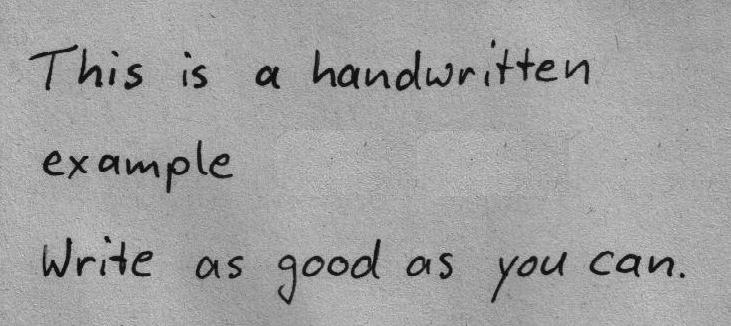

In [91]:
from PIL import Image
img = Image.open(file_name)
img

# **PREPROCESSING THE IMAGE :**

In [92]:
import cv2
import numpy as np
import pytesseract

img = cv2.imread(file_name)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.dilate(image, kernel, iterations = 3)
    
#erosion
def erode(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.erode(image, kernel, iterations = 3)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated



# **CALLING PREPROCESSING FUNCTIONS :**

In [93]:
gray = get_grayscale(img)
ero = erode(gray)
dil = dilate(ero)
open = opening(dil)
thresh = thresholding(open)
desk = deskew(thresh)

# **PRINTING RETRIEVED TEXT FROM TEST IMAGE :**

In [94]:
print("-----------------------------------------------------------------------------------------------------------------------------")
print ("The Recognized Text From The Input Image Is:")
print("-----------------------------------------------------------------------------------------------------------------------------\n\n")
print(pytesseract.image_to_string(desk))
print("\n\n-----------------------------------------------------------------------------------------------------------------------------")


-----------------------------------------------------------------------------------------------------------------------------
The Recognized Text From The Input Image Is:
-----------------------------------------------------------------------------------------------------------------------------


This is a handwritten
example

Write as qooal as you can,


-----------------------------------------------------------------------------------------------------------------------------
